In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from operator import sub

matplotlib.rc('font',**{'size': 20})

In [2]:
EPSILON = 0.1

def practical_points_generator(flops, accuracies, mode):
    all_data_points = []
    for i in range(len(flops)):
        for j in range(len(flops[i])):
            all_data_points.append((flops[i][j], accuracies[i][j]))
    if mode == 'max':
        sorted_data_points = sorted(all_data_points, key=lambda x: 10 ** 6 * x[0] - x[1])
        max_accuracy = 0
        for point in sorted_data_points:
            if point[1] - max_accuracy > EPSILON:
                max_accuracy = point[1]
                yield point
    else:
        sorted_data_points = sorted(all_data_points, key=lambda x: 10 ** 6 * x[0] + x[1])
        min_mae = 10 ** 6
        for point in sorted_data_points:
            if min_mae - point[1] > EPSILON:
                min_mae = point[1]
                yield point

In [3]:
def get_marker_linestyle_color(label):
    if label == 'CNN-Ignore-EE':
        return 'o', '-', 'b'
    elif label == 'MLP-Mixer-EE':
        return 'v', '--', 'g'
    elif label == 'MLP-EE':
        return 'P', '-.', 'r'
    elif label == 'ViT-EE':
        return 'X', ':', 'c'
    elif label == 'CNN-Add-EE':
        return 'D', '-', 'm'
    elif label == 'ResMLP-EE':
        return '^', '--', 'y'
    elif label == 'CNN-Project-EE':
        return 's', '-.', 'k'

In [4]:
def correct_flops(flops):
    new_flops = []
    for exit_type_flops in flops:
        new_exit_type_flops = []
        for flops in exit_type_flops:
            new_exit_type_flops.append(flops / 2)
        new_flops.append(new_exit_type_flops)
    return new_flops

def draw_plots(
    flops,
    accuracies,
    labels,
    ranges,
    name,
    backbone_flops,
    backbone_accuracy,
    mode='max',
    include_mlp=True,
    y_axis_limit=None
):
    flops = correct_flops(flops)
    backbone_flops /= 2
    fig, axes = plt.subplots(1, len(ranges), figsize=(30, 10))
    for range_index in range(len(ranges)):
        start = ranges[range_index][0]
        end = ranges[range_index][1]
        if len(ranges) == 1:
            ax = axes
        else:
            ax = axes[range_index]
        ax.set_title('%s, Exits %d to %d' % (name, start + 1, end))
        ax.set_xlabel('FLOPS (B)')
        ax.set_ylabel('Accuracy (%)' if mode == 'max' else 'MAE')
        used_flops = []
        used_accuracies = []
        for i in range(len(flops)):
            if include_mlp or labels[i] != 'MLP-EE':
                used_flops += flops[i][start:end]
                used_accuracies += accuracies[i][start:end]
                marker, linestyle, color = get_marker_linestyle_color(labels[i])
                ax.plot(
                    flops[i][start:end],
                    accuracies[i][start:end],
                    marker=marker,
                    linestyle=linestyle,
                    color=color,
                    label=labels[i],
                    markersize=8
                )
        if y_axis_limit is not None:
            ax.set_ylim(y_axis_limit)
        ax.legend()
        for point in practical_points_generator(flops, accuracies, mode):
            if point in zip(used_flops, used_accuracies):
                ax.plot(point[0], point[1], color='grey', marker='o', fillstyle='none', markersize=20)
    if len(ranges) == 1:
        last_ax = axes
    else:
        last_ax = axes[-1]
    last_ax.scatter([backbone_flops], [backbone_accuracy])
    last_ax.annotate(
        'Final',
        xy=(backbone_flops, backbone_accuracy),
        xytext=(-24, 8),
        textcoords='offset pixels'
    )

In [5]:
cnn_ignore_accuracies = [
    74.86,
    80.47,
    85.10,
    89.95,
    92.51,
    94.02,
    95.51,
    96.63,
    97.62,
    97.93,
    98.00,
]

cnn_ignore_flops = [10.039666312, 19.27067618, 28.501686048, 37.732695916, 46.963705784, 56.194715652, 65.42572552, 74.656735388, 83.887745256, 93.118755124, 102.349764992]

mlp_mixer_accuracies = [
    74.53,
    81.40,
    85.49,
    88.33,
    91.84,
    93.79,
    94.97,
    95.99,
    97.08,
    97.75,
    97.86,
]

mlp_mixer_flops = [16.054064008, 25.285073876, 34.516083744, 43.747093612, 52.97810348, 62.209113348, 71.440123216, 80.671133084, 89.902142952, 99.13315282, 108.364162688]

mlp_accuracies = [
    26.19,
    42.07,
    58.42,
    72.60,
    81.46,
    87.19,
    90.81,
    93.11,
    96.07,
    97.06,
    97.92,
]

mlp_flops = [9.915005706, 19.146015574, 28.377025442, 37.60803531, 46.839045178, 56.070055046, 65.301064914, 74.532074782, 83.76308465, 92.994094518, 102.225104386]

vit_accuracies = [
    79.14,
    84.91,
    89.83,
    92.60,
    94.61,
    96.04,
    96.65,
    97.39,
    97.67,
    98.02,
    98.09,
]

vit_flops = [19.146015574, 28.377025442, 37.60803531, 46.839045178, 56.070055046, 65.301064914, 74.532074782, 83.76308465, 92.994094518, 102.225104386, 111.456114254]

cnn_add_accuracies = [
    77.19,
    81.22,
    86.25,
    89.50,
    92.03,
    93.94,
    95.19,
    95.98,
    97.43,
    97.72,
    98.13,
]

cnn_add_flops = [10.039666312, 19.27067618, 28.501686048, 37.732695916, 46.963705784, 56.194715652, 65.42572552, 74.656735388, 83.887745256, 93.118755124, 102.349764992]

resmlp_accuracies = [
    74.99,
    85.49,
    90.45,
    92.44,
    94.14,
    94.76,
    95.93,
    96.60,
    97.63,
    97.94,
    98.12,
]

resmlp_flops = [15.88094452, 25.111954388, 34.342964256, 43.573974124, 52.804983992, 62.03599386, 71.267003728, 80.498013596, 89.729023464, 98.960033332, 108.1910432]

cnn_project_accuracies = [
    76.60,
    81.07,
    86.76,
    90.28,
    92.17,
    94.24,
    95.67,
    96.73,
    97.37,
    97.82,
    97.90,
]

cnn_project_flops = [10.167068296, 19.398078164, 28.629088032, 37.8600979, 47.091107768, 56.322117636, 65.553127504, 74.784137372, 84.01514724, 93.246157108, 102.477166976]

backbone_accuracy = 98.31
backbone_flops = 111.46

In [6]:
flops = [
    cnn_ignore_flops,
    mlp_mixer_flops,
    mlp_flops,
    vit_flops,
    cnn_add_flops,
    resmlp_flops,
    cnn_project_flops,
]
accuracies = [
    cnn_ignore_accuracies,
    mlp_mixer_accuracies,
    mlp_accuracies,
    vit_accuracies,
    cnn_add_accuracies,
    resmlp_accuracies,
    cnn_project_accuracies,
]
labels = [
    'CNN-Ignore-EE',
    'MLP-Mixer-EE',
    'MLP-EE',
    'ViT-EE',
    'CNN-Add-EE',
    'ResMLP-EE',
    'CNN-Project-EE',
]
ranges = [(0, 6), (5, 11)]
full_range = [(0, 11)]
name = 'CIFAR-10'

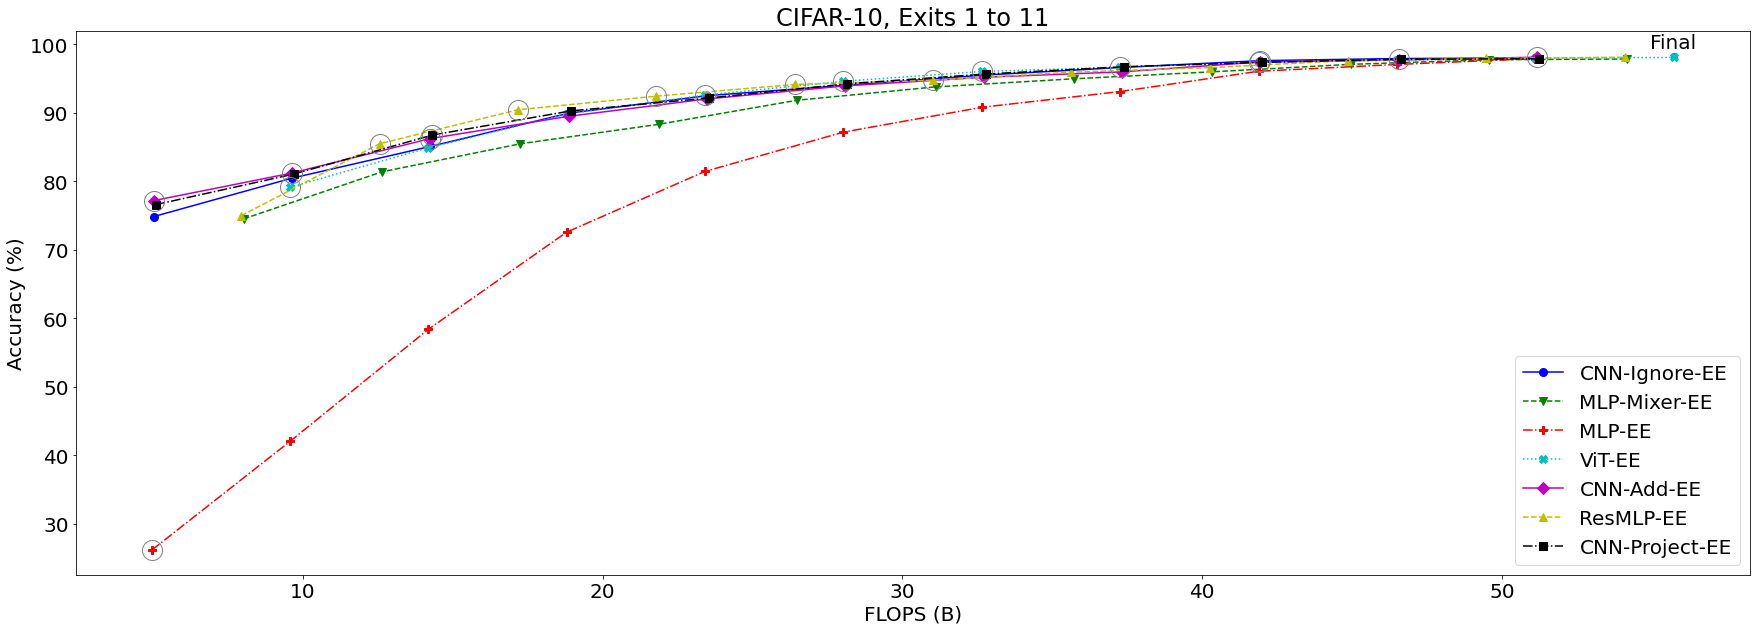

In [7]:
draw_plots(flops, accuracies, labels, full_range, name, backbone_flops, backbone_accuracy)

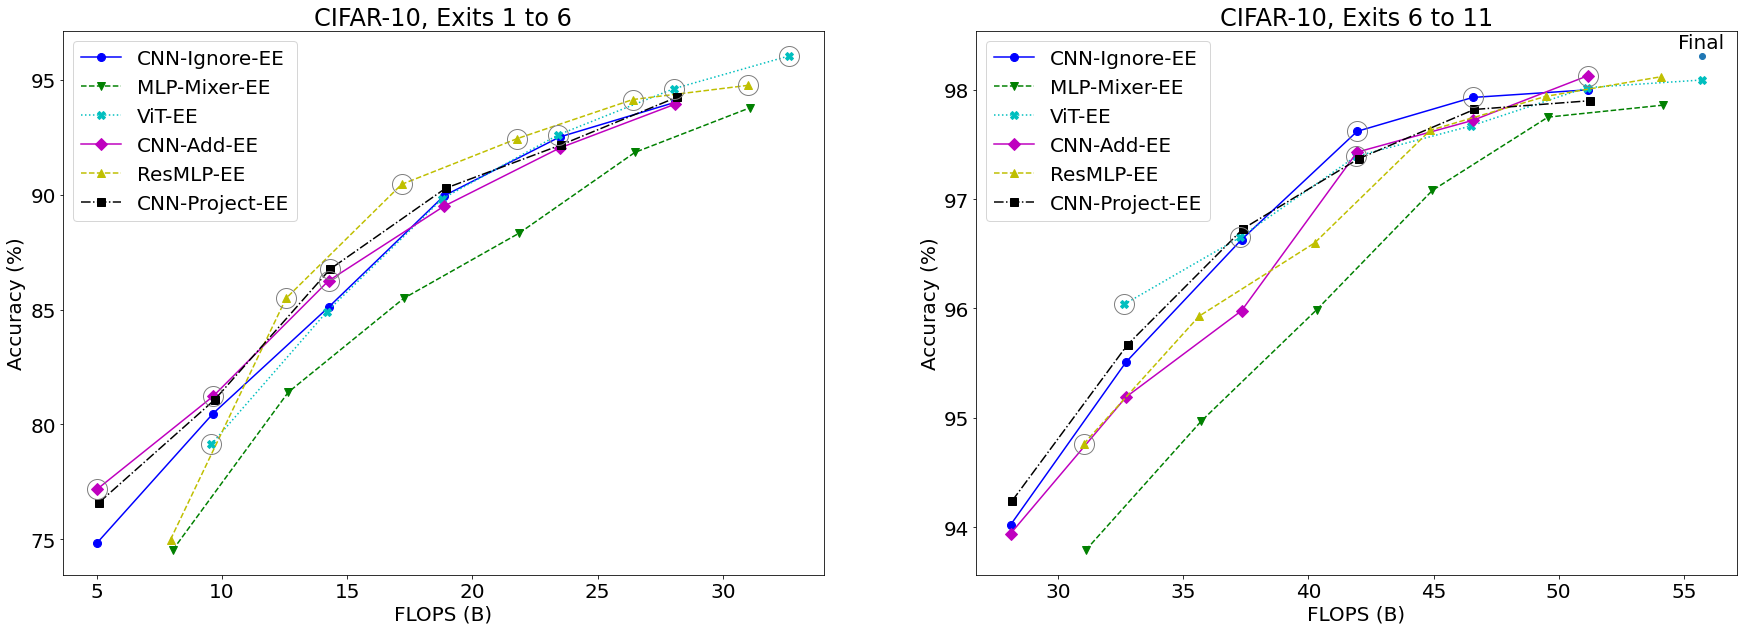

In [8]:
draw_plots(flops, accuracies, labels, ranges, name, backbone_flops, backbone_accuracy, include_mlp=False)

In [9]:
cnn_ignore_accuracies = [
    45.23,
    50.60,
    56.41,
    61.53,
    67.16,
    70.39,
    75.41,
    79.47,
    83.56,
    87.76,
    89.33,
]

cnn_ignore_flops = [10.039666312, 19.27067618, 28.501686048, 37.732695916, 46.963705784, 56.194715652, 65.42572552, 74.656735388, 83.887745256, 93.118755124, 102.349764992]

mlp_accuracies = [
    7.07,
    16.26,
    21.63,
    40.28,
    49.04,
    55.39,
    59.79,
    65.58,
    71.40,
    81.64,
    88.69,
]

mlp_flops = [9.915005706, 19.146015574, 28.377025442, 37.60803531, 46.839045178, 56.070055046, 65.301064914, 74.532074782, 83.76308465, 92.994094518, 102.225104386]

vit_accuracies = [
    31.08,
    45.04,
    58.59,
    66.54,
    73.44,
    79.18,
    83.10,
    86.26,
    88.38,
    90.12,
    90.92,
]

vit_flops = [19.146015574, 28.377025442, 37.60803531, 46.839045178, 56.070055046, 65.301064914, 74.532074782, 83.76308465, 92.994094518, 102.225104386, 111.456114254]

mlp_mixer_accuracies = [
    34.31,
    47.03,
    59.18,
    66.32,
    73.13,
    78.11,
    81.64,
    84.31,
    87.33,
    88.50,
    89.98,
]

mlp_mixer_flops = [16.054064008, 25.285073876, 34.516083744, 43.747093612, 52.97810348, 62.209113348, 71.440123216, 80.671133084, 89.902142952, 99.13315282, 108.364162688]

resmlp_accuracies = [
    34.65,
    58.73,
    66.71,
    72.44,
    76.88,
    80.94,
    84.51,
    86.83,
    88.51,
    90.20,
    91.13,
]

resmlp_flops = [15.88094452, 25.111954388, 34.342964256, 43.573974124, 52.804983992, 62.03599386, 71.267003728, 80.498013596, 89.729023464, 98.960033332, 108.1910432]

cnn_project_accuracies = [
    43.46,
    47.42,
    50.43,
    59.26,
    60.92,
    64.07,
    68.61,
    70.97,
    65.69,
    70.57,
    80.95,
]

cnn_project_flops = [10.167068296, 19.398078164, 28.629088032, 37.8600979, 47.091107768, 56.322117636, 65.553127504, 74.784137372, 84.01514724, 93.246157108, 102.477166976]

cnn_add_accuracies = [
    44.36,
    47.66,
    52.82,
    58.94,
    62.96,
    65.25,
    70.61,
    69.48,
    73.92,
    78.11,
    80.88,
]

cnn_add_flops = [10.039666312, 19.27067618, 28.501686048, 37.732695916, 46.963705784, 56.194715652, 65.42572552, 74.656735388, 83.887745256, 93.118755124, 102.349764992]

backbone_accuracy = 91.24
backbone_flops = 111.46

In [10]:
flops = [
    cnn_ignore_flops,
    mlp_mixer_flops,
    mlp_flops,
    vit_flops,
    cnn_add_flops,
    resmlp_flops,
    cnn_project_flops,
]
accuracies = [
    cnn_ignore_accuracies,
    mlp_mixer_accuracies,
    mlp_accuracies,
    vit_accuracies,
    cnn_add_accuracies,
    resmlp_accuracies,
    cnn_project_accuracies,
]
markers = ['o', 'v', 'P', 'X', 'D', '^', 's'] # https://matplotlib.org/2.0.2/api/lines_api.html
linestyles = ['-', '--', '-.', ':']
labels = [
    'CNN-Ignore-EE',
    'MLP-Mixer-EE',
    'MLP-EE',
    'ViT-EE',
    'CNN-Add-EE',
    'ResMLP-EE',
    'CNN-Project-EE',
]
ranges = [(0, 6), (5, 11)]
name = 'CIFAR-100'

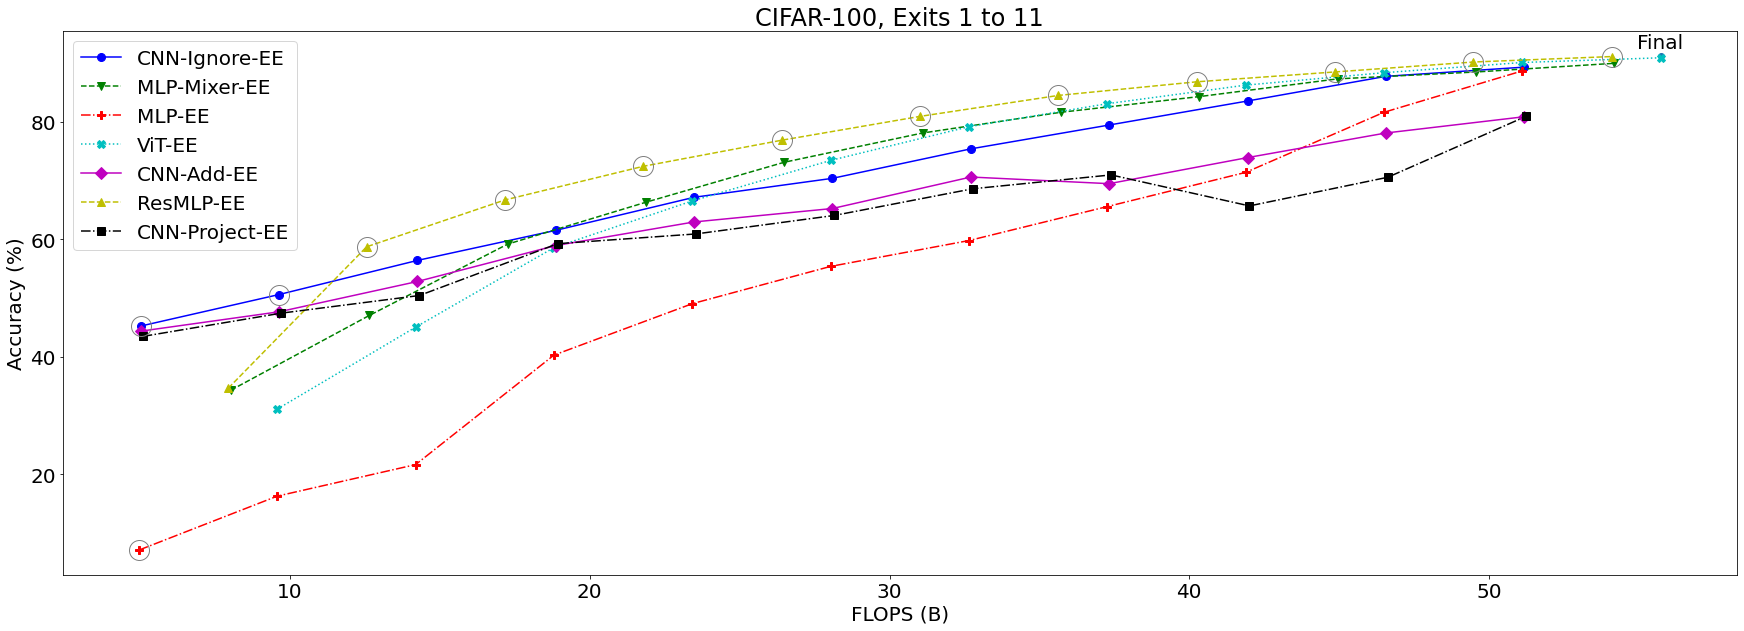

In [11]:
draw_plots(flops, accuracies, labels, full_range, name, backbone_flops, backbone_accuracy)

In [12]:
draw_plots(flops, accuracies, labels, ranges, name, backbone_flops, backbone_accuracy, include_mlp=False)

In [13]:
mlp_maes_5 = [66.95597652493295, 55.6043279293333, 40.01493319068866, 27.534241703863543, 20.099828833925915, 16.6587248431277, 14.207798832063078, 13.643488861268288, 12.692167538868029, 11.745789087804178, 11.116295196966094]

mlp_maes_4 = [63.81760612188089, 48.84459626358478, 31.38019274014999, 21.35408311672693, 17.32409016078545, 15.096452528379604, 13.05824572280687, 12.952922174428489, 12.154847678503849, 11.278382839842044, 10.903999793224612]

mlp_maes = [min(mlp_maes_4[i], mlp_maes_5[i]) for i in range(len(mlp_maes_4))]

mlp_flops = [9.915005706, 19.146015574, 28.377025442, 37.60803531, 46.839045178, 56.070055046, 65.301064914, 74.532074782, 83.76308465, 92.994094518, 102.225104386]

resmlp_maes_4 = [17.60861961755429, 15.780182688240421, 14.967578141838581, 12.967585373219885, 13.565632146464361, 17.838170967843872, 25.29613745927154, 18.395887481893116, 22.84772446918155, 21.12996455613271, 19.378696329954778]

resmlp_maes_5 = [37.567863819194585, 16.379686318456177, 15.91074247730594, 14.830663657496425, 14.105883239636947, 13.518657890148038, 14.987332331531313, 13.092971086047813, 12.99657056636505, 11.822814100180334, 13.347536167698324]

resmlp_maes = [min(resmlp_maes_4[i], resmlp_maes_5[i]) for i in range(len(resmlp_maes_4))]

resmlp_flops = [15.88094452, 25.111954388, 34.342964256, 43.573974124, 52.804983992, 62.03599386, 71.267003728, 80.498013596, 89.729023464, 98.960033332, 108.1910432]

vit_maes_4 = [17.25549441917847, 15.310706459980956, 13.595461759060662, 12.577511369468663, 12.067579316858268, 11.083785289440117, 11.188187754225888, 10.87809422029592, 11.642507894276399, 10.745084875372624, 10.597995807472484]

vit_maes_5 = [20.92489066249554, 17.892692841223028, 15.841838350091864, 14.224327003689748, 13.197131156595411, 12.574951000025784, 12.357885581834648, 11.632370412163207, 11.68577344596502, 11.010207051810061, 10.896251262811639]

vit_maes = [min(vit_maes_4[i], vit_maes_5[i]) for i in range(len(vit_maes_4))]

vit_alt_maes = [18.049246351608634, 15.180274767263906, 13.628905414822626, 12.978167053696502, 11.69005954003767, 11.319822538837004, 10.915161482429214, 11.06383380322437, 10.836275275190616, 10.95410315675852, 10.759412091444661]

vit_flops = [19.146015574, 28.377025442, 37.60803531, 46.839045178, 56.070055046, 65.301064914, 74.532074782, 83.76308465, 92.994094518, 102.225104386, 111.456114254]

cnn_ignore_maes_4 = [16.324433793363568, 15.642264217512718, 15.203111727147673, 14.539004881089028, 14.859935972397198, 16.9033360170686, 14.710937910877693, 15.024733024942853, 13.002627540657842, 15.919211207802743, 13.1617159714426]

cnn_ignore_maes_5 = [19.472250306927545, 16.382709773809054, 15.30624921188889, 16.640002978804905, 15.339903997527072, 14.558104298405594, 14.186327249106556, 18.8666830396562, 15.023331387561072, 16.011291563485088, 16.721815794863026]

cnn_ignore_maes = [min(cnn_ignore_maes_4[i], cnn_ignore_maes_5[i]) for i in range(len(cnn_ignore_maes_4))]

cnn_ignore_flops = [10.039666312, 19.27067618, 28.501686048, 37.732695916, 46.963705784, 56.194715652, 65.42572552, 74.656735388, 83.887745256, 93.118755124, 102.349764992]

cnn_add_maes_4 = [18.90440685073256, 16.726752551982553, 13.927111037765874, 13.950359128337304, 15.485235473291226, 13.63742827597631, 15.302497663269468, 14.101453771361111, 13.903442669190742, 13.146807598164951, 11.929169691797588]

cnn_add_maes_5 = [23.029530046001007, 17.36398403153728, 17.532784224678203, 15.0629114230157, 14.053487970473283, 14.495352183394191, 12.894946989563001, 15.040746399772036, 14.855697106636278, 13.728063926384943, 12.44930448742072]

cnn_add_maes = [min(cnn_add_maes_4[i], cnn_add_maes_5[i]) for i in range(len(cnn_add_maes_4))]

cnn_add_flops = [10.039666312, 19.27067618, 28.501686048, 37.732695916, 46.963705784, 56.194715652, 65.42572552, 74.656735388, 83.887745256, 93.118755124, 102.349764992]

cnn_project_maes_4 = [17.97360331761429, 15.467450911446946, 14.959393072910776, 14.132034754839491, 16.076203802519633, 14.18988822844617, 13.815687876052461, 12.58639125568036, 11.517910521763955, 12.874515941075424, 13.256840143438424]

cnn_project_maes_5 = [27.43422174678897, 16.961936098398724, 15.575427034930241, 14.76191664899309, 13.80299366597453, 13.76081104695114, 13.545493860247136, 12.36295470406632, 12.355132346136038, 11.9225329570658, 13.00598683830469]

cnn_project_maes = [min(cnn_project_maes_4[i], cnn_project_maes_5[i]) for i in range(len(cnn_project_maes_4))]

cnn_project_flops = [10.167068296, 19.398078164, 28.629088032, 37.8600979, 47.091107768, 56.322117636, 65.553127504, 74.784137372, 84.01514724, 93.246157108, 102.477166976]

mlp_mixer_maes_4 = [17.449155579073565, 15.024769666981092, 13.918311021642689, 13.102047395174287, 13.740980489502375, 13.465846355746645, 13.171297758797463, 15.58475445045778, 14.971250198540853, 18.186729623156797, 17.877043017754772]

mlp_mixer_maes_5 = [17.895658858100944, 15.83869162005821, 14.261989270241047, 13.886250207755124, 13.046678551942659, 12.559346749946299, 14.470972782496279, 12.07975543923034, 12.112579300768346, 13.57506639775688, 12.628674099279955]

mlp_mixer_maes = [min(mlp_mixer_maes_4[i], mlp_mixer_maes_5[i]) for i in range(len(mlp_mixer_maes_4))]

mlp_mixer_flops = [16.054064008, 25.285073876, 34.516083744, 43.747093612, 52.97810348, 62.209113348, 71.440123216, 80.671133084, 89.902142952, 99.13315282, 108.364162688]

backbone_mae = 11.07
backbone_flops = 111.46

In [14]:
flops = [
    mlp_flops,
    vit_flops,
    resmlp_flops,
    cnn_ignore_flops,
    cnn_add_flops,
    cnn_project_flops,
    mlp_mixer_flops,
]
maes = [
    mlp_maes,
    vit_maes,
    resmlp_maes,
    cnn_ignore_maes,
    cnn_add_maes,
    cnn_project_maes,
    mlp_mixer_maes,
]
markers = ['o', 'v', 'P', 'X', 'D', '^', 's'] # https://matplotlib.org/2.0.2/api/lines_api.html
linestyles = ['-', '--', '-.', ':']
labels = [
    'MLP-EE',
    'ViT-EE',
    'ResMLP-EE',
    'CNN-Ignore-EE',
    'CNN-Add-EE',
    'CNN-Project-EE',
    'MLP-Mixer-EE'
]
ranges = [(0, 6), (5, 11)]
name = 'DISCO'

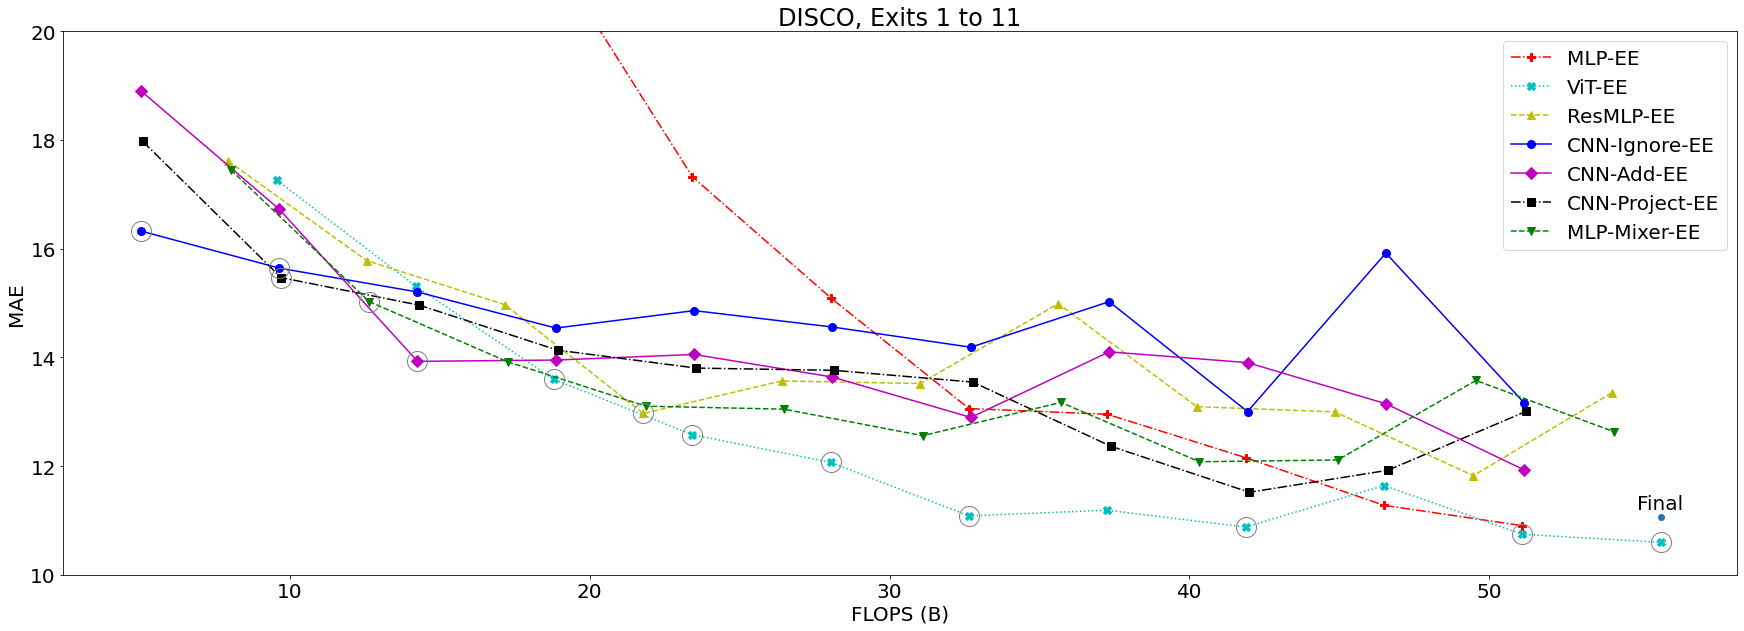

In [15]:
draw_plots(flops, maes, labels, full_range, name, backbone_flops, backbone_mae, mode='min', y_axis_limit=[10, 20])

In [16]:
mlp_flops = [9.915005706, 19.146015574, 28.377025442, 37.60803531, 46.839045178, 56.070055046, 65.301064914, 74.532074782, 83.76308465, 92.994094518, 102.225104386]
mlp_accuracies = [60.66, 73.76, 82.65, 87.55, 89.60, 92.23, 92.97, 94.04, 94.67, 94.83, 94.81]
cnn_ignore_flops = [10.039666312, 19.27067618, 28.501686048, 37.732695916, 46.963705784, 56.194715652, 65.42572552, 74.656735388, 83.887745256, 93.118755124, 102.349764992]
cnn_ignore_accuracies = [92.86, 93.42, 93.49, 93.74, 93.85, 94.12, 94.16, 94.49, 94.58, 94.73, 94.79]
cnn_add_flops = [10.039666312, 19.27067618, 28.501686048, 37.732695916, 46.963705784, 56.194715652, 65.42572552, 74.656735388, 83.887745256, 93.118755124, 102.349764992]
cnn_add_accuracies = [92.45, 93.08, 93.83, 93.75, 93.67, 93.54, 93.91, 94.52, 94.71, 94.68, 94.68]
cnn_project_flops = [10.167068296, 19.398078164, 28.629088032, 37.8600979, 47.091107768, 56.322117636, 65.553127504, 74.784137372, 84.01514724, 93.246157108, 102.477166976]
cnn_project_accuracies = [92.72, 92.95, 94.13, 93.68, 93.71, 93.84, 94.15, 94.52, 94.65, 94.49, 94.88]
vit_flops = [19.146015574, 28.377025442, 37.60803531, 46.839045178, 56.070055046, 65.301064914, 74.532074782, 83.76308465, 92.994094518, 102.225104386, 111.456114254]
vit_accuracies = [91.38, 92.28, 92.61, 93.48, 93.86, 94.19, 94.54, 94.65, 94.85, 94.94, 94.89]
resmlp_flops = [15.88094452, 25.111954388, 34.342964256, 43.573974124, 52.804983992, 62.03599386, 71.267003728, 80.498013596, 89.729023464, 98.960033332, 108.1910432]
resmlp_accuracies = [90.25, 92.54, 93.64, 93.76, 93.63, 93.68, 94.08, 94.40, 94.74, 94.82, 94.85]
mlp_mixer_flops = [16.054064008, 25.285073876, 34.516083744, 43.747093612, 52.97810348, 62.209113348, 71.440123216, 80.671133084, 89.902142952, 99.13315282, 108.364162688]
mlp_mixer_accuracies = [90.81, 92.52, 93.26, 93.78, 93.42, 93.94, 94.08, 94.52, 94.78, 94.77, 94.86]
backbone_accuracy = 95.00
backbone_flops = 111.46

In [17]:
flops = [
    cnn_ignore_flops,
    mlp_mixer_flops,
    mlp_flops,
    vit_flops,
    cnn_add_flops,
    resmlp_flops,
    cnn_project_flops,
]
accuracies = [
    cnn_ignore_accuracies,
    mlp_mixer_accuracies,
    mlp_accuracies,
    vit_accuracies,
    cnn_add_accuracies,
    resmlp_accuracies,
    cnn_project_accuracies,
]
markers = ['o', 'v', 'P', 'X', 'D', '^', 's'] # https://matplotlib.org/2.0.2/api/lines_api.html
linestyles = ['-', '--', '-.', ':']
labels = [
    'CNN-Ignore-EE',
    'MLP-Mixer-EE',
    'MLP-EE',
    'ViT-EE',
    'CNN-Add-EE',
    'ResMLP-EE',
    'CNN-Project-EE',
]
ranges = [(0, 6), (5, 11)]
name = 'Fashion MNIST'

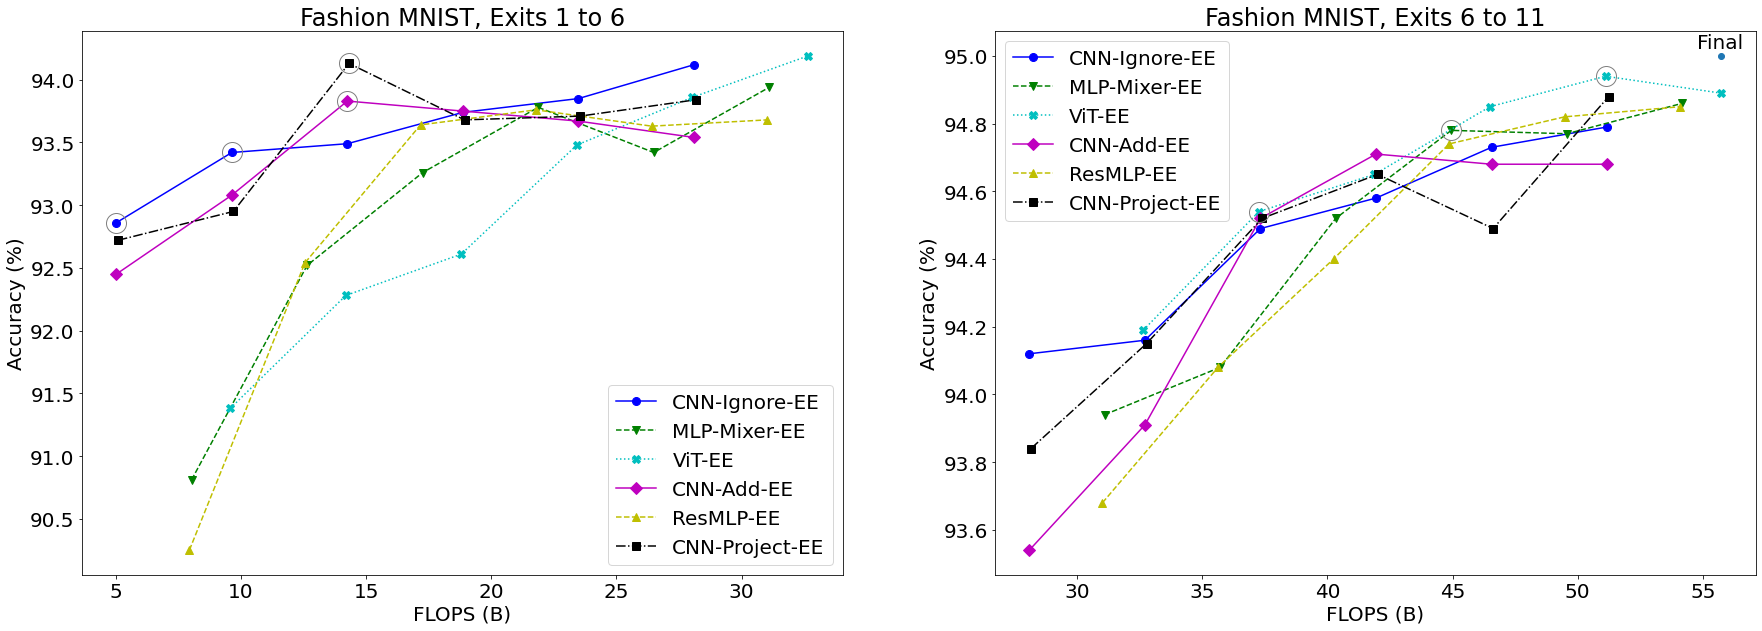

In [18]:
draw_plots(flops, accuracies, labels, ranges, name, backbone_flops, backbone_accuracy, include_mlp=False)